In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
ETF1=pd.read_csv('00690.csv')
ETF2=pd.read_csv('00728.csv')

ETF1.set_index(pd.to_datetime(ETF1['Date']),inplace=True)
ETF1.drop('Date',axis=1,inplace=True)
ETF2.set_index(pd.to_datetime(ETF2['Date']),inplace=True)
ETF2.drop('Date',axis=1,inplace=True)

df=pd.merge(ETF1,ETF2,left_index=True,right_index=True,how='inner')
df.rename(columns={'Price_x':'00690','Price_y':'00728'},inplace=True)
df.head()

,00690,00728
Date,,
2018-04-18,22.06,19.57
2018-04-19,22.23,19.85
2018-04-20,21.97,19.55
2018-04-23,21.84,19.33
2018-04-24,21.73,19.07


# Risk
## 標準差: 代表標的的穩定程度
### 標準差愈大，代表波動程度愈高
## $$\sigma=\sqrt{\frac{1}{n-1}\sum_{i=1}^{n}(x_i-\bar{x})^2}$$

In [3]:
dr=df.pct_change(1)
dr.head()

C:\Users\tinah\Anaconda3\lib\site-packages\pandas\compat\_optional.py:106: UserWarning: Pandas requires version '2.6.2' or newer of 'numexpr' (version '2.6.1' currently installed).
  warnings.warn(msg, UserWarning)


,00690,00728
Date,,
2018-04-18,NaN,NaN
2018-04-19,0.007706,0.014308
2018-04-20,-0.011696,-0.015113
2018-04-23,-0.005917,-0.011253
2018-04-24,-0.005037,-0.013451


In [4]:
risk=dr.std()
risk

00690    0.010330
00728    0.011376
dtype: float64

## 年化標準差
## $$\sigma_Y=\sigma \times \sqrt{252}$$

In [5]:
risk_Y=risk*252**0.5
risk_Y

00690    0.163985
00728    0.180594
dtype: float64

In [6]:
rolling_risk=dr.rolling(252).std()*252**0.5
rolling_risk.tail()

,00690,00728
Date,,
2020-09-08,0.205747,0.213387
2020-09-09,0.205833,0.213805
2020-09-10,0.205878,0.213807
2020-09-11,0.205258,0.213660
2020-09-14,0.205462,0.213702


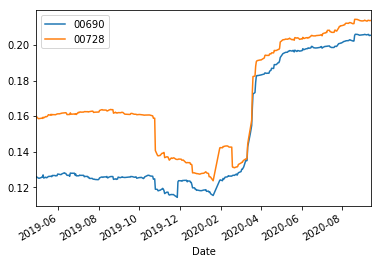

In [7]:
rolling_risk.dropna().plot()